In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

(150, 4)


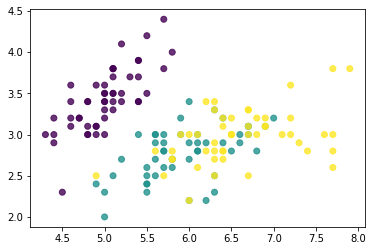

In [ ]:
iris = load_iris()

x = iris.data
y = iris.target

print(x.shape)
plt.scatter(x[:,0], x[:,1], c=y, alpha=0.8)

# **Train Test Split**
**Entrainer et evaluer**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=5)

print('Train set:', x_train.shape)
print('Test set:', x_test.shape)

Train set: (120, 4)
Test set: (30, 4)


Text(0.5, 1.0, 'Test set')

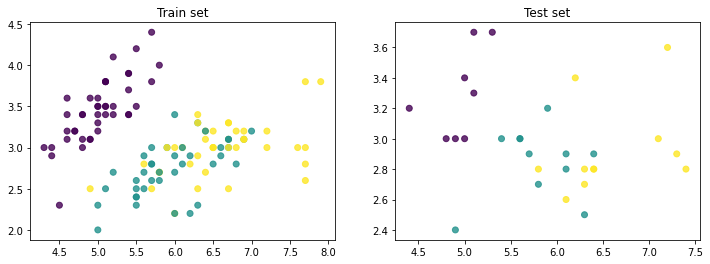

In [ ]:
plt.figure(figsize=(12, 4))
plt.subplot(121)
plt.scatter(x_train[:,0], x_train[:,1], c=y_train, alpha=0.8)
plt.title('Train set')
plt.subplot(122)
plt.scatter(x_test[:,0], x_test[:,1], c=y_test, alpha=0.8)
plt.title('Test set')

**Entrainement du modele ML**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
model = KNeighborsClassifier(n_neighbors=1)

model.fit(x_train, y_train)
print('Train Score', model.score(x_train, y_train))
print('Test Score', model.score(x_test, y_test))

Train Score 1.0
Test Score 0.9


In [ ]:
model = KNeighborsClassifier(n_neighbors=6) ### n_neighbors = 3 : 6

model.fit(x_train, y_train)
print('Train Score', model.score(x_train, y_train))
print('Test Score', model.score(x_test, y_test))

Train Score 0.9833333333333333
Test Score 0.9666666666666667


# **Validation** / **decoupage du Data_Set**
# **Cross Validation** / **decoupage du Train_Set**
**Ameliorer le modele**

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
cross_val_score(KNeighborsClassifier(), x_train, y_train, cv=5, scoring='accuracy')

array([1.        , 1.        , 1.        , 0.95833333, 0.95833333])

In [ ]:
cross_val_score(KNeighborsClassifier(1), x_train, y_train, cv=5, scoring='accuracy').mean()

0.975

In [ ]:
val_score = []
for k in range(1, 50):
  score = cross_val_score(KNeighborsClassifier(k), x_train, y_train, cv=5, scoring='accuracy').mean()
  val_score.append(score)

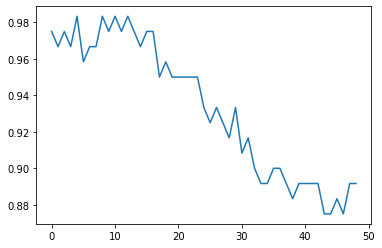

In [ ]:
plt.plot(val_score)

# **Validation curve**

In [ ]:
from sklearn.model_selection import validation_curve

In [ ]:
model = KNeighborsClassifier()
k = np.arange(1, 50)

train_score, val_score = validation_curve(model, x_train, y_train, 'n_neighbors', k, cv=5)

TypeError: ignored

In [ ]:
val_score.shape

In [ ]:
val_score.mean(axis=1)

array([0.975     , 0.96666667, 0.975     , 0.96666667, 0.98333333,
       0.95833333, 0.96666667, 0.96666667, 0.98333333, 0.975     ,
       0.98333333, 0.975     , 0.98333333, 0.975     , 0.96666667,
       0.975     , 0.975     , 0.95      , 0.95833333, 0.95      ,
       0.95      , 0.95      , 0.95      , 0.95      , 0.94166667,
       0.925     , 0.93333333, 0.925     , 0.91666667, 0.93333333,
       0.90833333, 0.91666667, 0.9       , 0.89166667, 0.89166667,
       0.9       , 0.9       , 0.89166667, 0.88333333, 0.89166667,
       0.89166667, 0.89166667, 0.89166667, 0.875     , 0.875     ,
       0.88333333, 0.875     , 0.89166667, 0.89166667])

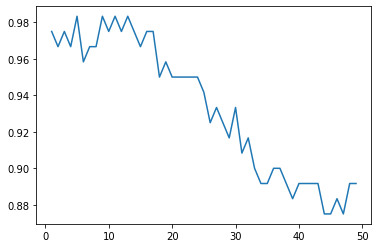

In [ ]:
plt.plot(k, val_score.mean(axis=1))

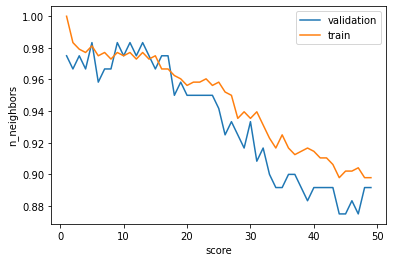

In [ ]:
plt.plot(k, val_score.mean(axis=1), label='validation')
plt.plot(k, train_score.mean(axis=1), label='train')

plt.xlabel('score')
plt.ylabel('n_neighbors')
plt.legend()

# **OverFitting**
Le modele s'est trop perfectionne sur le **Trainset** et a ***perdu tout sens*** de ***generalisation***

## **GridSearchCV**

In [ ]:
from sklearn.model_selection import GridSearchCV #pour subdiviser le datasets

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=5)

param_grid={'n_neighbors':np.arange(1,20),'metric':['euclidean','manhattan', 'minkowski']}
grid=GridSearchCV(KNeighborsClassifier(),param_grid,cv=5)
grid.fit(x_train,y_train)


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan', 'minkowski'],
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])})

In [ ]:
grid.best_score_

0.9833333333333334

In [ ]:
grid.best_params_

{'metric': 'euclidean', 'n_neighbors': 5}

In [ ]:
model = grid.best_estimator_

In [ ]:
model.score(x_test, y_test)

0.9333333333333333

# **Confusion Matrix**
Outil de mesure tres utilie pour evaluer la qualite d'un modele de classification

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
confusion_matrix(y_test, model.predict(x_test))

array([[ 8,  0,  0],
       [ 0,  9,  2],
       [ 0,  0, 11]])

# **Learning Curve**
L'evolution de la performance de la machine

In [ ]:
from sklearn.model_selection import learning_curve

In [ ]:
N, train_score, val_score = learning_curve(model, x_train, y_train, train_sizes=np.linspace(0.2,1.0,10), cv=5)

In [ ]:
print(N)

[19 27 36 44 53 61 70 78 87 96]


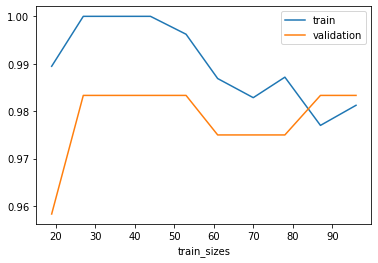

In [ ]:
plt.plot(N, train_score.mean(axis=1), label='train')
plt.plot(N, val_score.mean(axis=1), label='validation')
plt.xlabel('train_sizes')
plt.legend()